In [1]:
#Notebook to make revised version of the scatter plots showing the warming at tropical and high latitudes. 
#Makes paper figures 4, S4, S5, S9

#Rick Russotto
#Started 2019-11-19

#February 2020: Changing instantaneous CO2 forcing color to purple;
#adding statistical tests for slope being different 1


In [34]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from voigtColors import voigtColors
from scipy.stats import ttest_1samp
from scipy.stats import binom_test

In [5]:
#Lists of models 

models = ['AM2', 'CAM3', 'CAM4', 'CNRM-AM6-DIA-v2', 'ECHAM-6.1', 'ECHAM-6.3',
       'IPSL-CM5A', 'MIROC5', 'MPAS', 'MetUM-GA6-CTL', 'MetUM-GA6-ENT',
       'NorESM2']

models_noCNRM = ['AM2', 'CAM3', 'CAM4', 'ECHAM-6.1', 'ECHAM-6.3',
       'IPSL-CM5A', 'MIROC5', 'MPAS', 'MetUM-GA6-CTL', 'MetUM-GA6-ENT',
       'NorESM2']

models_noMetENT = ['AM2', 'CAM3', 'CAM4', 'ECHAM-6.1', 'ECHAM-6.3',
       'IPSL-CM5A', 'MIROC5', 'MPAS', 'MetUM-GA6-CTL',
       'NorESM2']

models_10 = ['AM2', 'CAM3', 'CAM4', 'ECHAM-6.1', 'ECHAM-6.3',
       'IPSL-CM5A', 'MIROC5', 'MPAS', 'MetUM-GA6-CTL', 'MetUM-GA6-ENT']

In [6]:
#Load GCM results and calculate anomalies 
ds_GCM = xr.open_dataset('../nc_revised_20181130/master.nc')
ds_GCM_anom = (ds_GCM.sel(exp='Aqua4xCO2')-ds_GCM.sel(exp='AquaControl')).mean(dim='time').mean(dim='lon')

/usr/local/python/anaconda3/envs/pangeo-latest/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


In [7]:
#Load results from each EBM experiment 
EBM_control = xr.open_dataset('nc_from_xarray/EBM_perturb_results_noG_096e4.nc')
EBM_f_inst = xr.open_dataset('nc_from_xarray/EBM_results_noG_f_inst.nc')
EBM_adj_sw_cloud = xr.open_dataset('nc_from_xarray/EBM_results_noG_adj_sw_cloud.nc')
EBM_adj_sw_noncloud = xr.open_dataset('nc_from_xarray/EBM_results_noG_adj_sw_noncloud.nc')
EBM_adj_lw_ta = xr.open_dataset('nc_from_xarray/EBM_results_noG_adj_lw_ta.nc')
EBM_adj_lw_wv = xr.open_dataset('nc_from_xarray/EBM_results_noG_adj_lw_wv.nc')
EBM_adj_lw_cloud = xr.open_dataset('nc_from_xarray/EBM_results_noG_adj_lw_cloud.nc')
EBM_fb_sw_cloud = xr.open_dataset('nc_from_xarray/EBM_results_noG_fb_sw_cloud.nc')
EBM_fb_sw_noncloud = xr.open_dataset('nc_from_xarray/EBM_results_noG_fb_sw_noncloud.nc')
EBM_fb_lw_wv = xr.open_dataset('nc_from_xarray/EBM_results_noG_fb_lw_wv.nc')
EBM_fb_lw_ts = xr.open_dataset('nc_from_xarray/EBM_results_noG_fb_lw_ts.nc')
EBM_fb_lw_cloud = xr.open_dataset('nc_from_xarray/EBM_results_noG_fb_lw_cloud.nc')
EBM_fb_lw_ta_05p = xr.open_dataset('nc_from_xarray/EBM_results_noG_fb_lw_ta_05p.nc')
EBM_fb_lw_ta_10p = xr.open_dataset('nc_from_xarray/EBM_results_noG_fb_lw_ta_10p.nc')
EBM_fb_lw_ta_15p = xr.open_dataset('nc_from_xarray/EBM_results_noG_fb_lw_ta_15p.nc')

In [8]:
#Tropical perturbations only cases
EBM_f_inst_tr = xr.open_dataset('nc_from_xarray/EBM_results_noG_f_inst_tr.nc')
EBM_adj_sw_cloud_tr = xr.open_dataset('nc_from_xarray/EBM_results_noG_adj_sw_cloud_tr.nc')
EBM_adj_sw_noncloud_tr = xr.open_dataset('nc_from_xarray/EBM_results_noG_adj_sw_noncloud_tr.nc')
EBM_adj_lw_ta_tr = xr.open_dataset('nc_from_xarray/EBM_results_noG_adj_lw_ta_tr.nc')
EBM_adj_lw_wv_tr = xr.open_dataset('nc_from_xarray/EBM_results_noG_adj_lw_wv_tr.nc')
EBM_adj_lw_cloud_tr = xr.open_dataset('nc_from_xarray/EBM_results_noG_adj_lw_cloud_tr.nc')
EBM_fb_sw_cloud_tr = xr.open_dataset('nc_from_xarray/EBM_results_noG_fb_sw_cloud_tr.nc')
EBM_fb_sw_noncloud_tr = xr.open_dataset('nc_from_xarray/EBM_results_noG_fb_sw_noncloud_tr.nc')
EBM_fb_lw_wv_tr = xr.open_dataset('nc_from_xarray/EBM_results_noG_fb_lw_wv_tr.nc')
EBM_fb_lw_ts_tr = xr.open_dataset('nc_from_xarray/EBM_results_noG_fb_lw_ts_tr.nc')
EBM_fb_lw_cloud_tr = xr.open_dataset('nc_from_xarray/EBM_results_noG_fb_lw_cloud_tr.nc')
EBM_fb_lw_ta_05p_tr = xr.open_dataset('nc_from_xarray/EBM_results_noG_fb_lw_ta_05p_tr.nc')
EBM_fb_lw_ta_10p_tr = xr.open_dataset('nc_from_xarray/EBM_results_noG_fb_lw_ta_10p_tr.nc')
#EBM_fb_lw_ta_15p_tr = xr.open_dataset('nc_from_xarray/EBM_results_noG_fb_lw_ta_15p_tr.nc') #Not done yet but don't need (eventually finished)

In [9]:
#Extratropical perturbations only cases
EBM_f_inst_et = xr.open_dataset('nc_from_xarray/EBM_results_noG_f_inst_et.nc')
EBM_adj_sw_cloud_et = xr.open_dataset('nc_from_xarray/EBM_results_noG_adj_sw_cloud_et.nc')
EBM_adj_sw_noncloud_et = xr.open_dataset('nc_from_xarray/EBM_results_noG_adj_sw_noncloud_et.nc')
EBM_adj_lw_ta_et = xr.open_dataset('nc_from_xarray/EBM_results_noG_adj_lw_ta_et.nc')
EBM_adj_lw_wv_et = xr.open_dataset('nc_from_xarray/EBM_results_noG_adj_lw_wv_et.nc')
EBM_adj_lw_cloud_et = xr.open_dataset('nc_from_xarray/EBM_results_noG_adj_lw_cloud_et.nc')
EBM_fb_sw_cloud_et = xr.open_dataset('nc_from_xarray/EBM_results_noG_fb_sw_cloud_et.nc')
EBM_fb_sw_noncloud_et = xr.open_dataset('nc_from_xarray/EBM_results_noG_fb_sw_noncloud_et.nc')
EBM_fb_lw_wv_et = xr.open_dataset('nc_from_xarray/EBM_results_noG_fb_lw_wv_et.nc')
EBM_fb_lw_ts_et = xr.open_dataset('nc_from_xarray/EBM_results_noG_fb_lw_ts_et.nc')
EBM_fb_lw_cloud_et = xr.open_dataset('nc_from_xarray/EBM_results_noG_fb_lw_cloud_et.nc')
EBM_fb_lw_ta_05p_et = xr.open_dataset('nc_from_xarray/EBM_results_noG_fb_lw_ta_05p_et.nc')
EBM_fb_lw_ta_10p_et = xr.open_dataset('nc_from_xarray/EBM_results_noG_fb_lw_ta_10p_et.nc')
#EBM_fb_lw_ta_15p_et = xr.open_dataset('nc_from_xarray/EBM_results_noG_fb_lw_ta_15p_et.nc')

In [10]:
#Concatenate the results along an experiment dimension (skip 5% and 15% this time)

exp_list=['all', 'no_f_inst', 'no_adj_sw_cloud', 'no_adj_sw_noncloud', 'no_adj_lw_cloud', 'no_adj_lw_wv', 'no_adj_lw_ta', 
     'no_fb_sw_cloud', 'no_fb_sw_noncloud', 'no_fb_lw_cloud', 'no_fb_lw_wv', 'no_fb_lw_ts', 'no_fb_lw_ta_10p']
exp_list_no_all = ['no_f_inst', 'no_adj_sw_cloud', 'no_adj_sw_noncloud', 'no_adj_lw_cloud', 'no_adj_lw_wv', 'no_adj_lw_ta', 
     'no_fb_sw_cloud', 'no_fb_sw_noncloud', 'no_fb_lw_cloud', 'no_fb_lw_wv', 'no_fb_lw_ts', 'no_fb_lw_ta_10p']
exp=pd.Index(exp_list)
EBM_results = xr.concat([EBM_control, EBM_f_inst, EBM_adj_sw_cloud, EBM_adj_sw_noncloud, 
                         EBM_adj_lw_cloud, EBM_adj_lw_wv, EBM_adj_lw_ta, 
                         EBM_fb_sw_cloud, EBM_fb_sw_noncloud, 
                         EBM_fb_lw_cloud, EBM_fb_lw_wv, EBM_fb_lw_ts, 
                         EBM_fb_lw_ta_10p], dim=exp)
EBM_results = EBM_results.rename({'concat_dim': 'exp'})
EBM_results_tr = xr.concat([EBM_control, EBM_f_inst_tr, EBM_adj_sw_cloud_tr, EBM_adj_sw_noncloud_tr, 
                         EBM_adj_lw_cloud_tr, EBM_adj_lw_wv_tr, EBM_adj_lw_ta_tr, 
                         EBM_fb_sw_cloud_tr, EBM_fb_sw_noncloud_tr, 
                         EBM_fb_lw_cloud_tr, EBM_fb_lw_wv_tr, EBM_fb_lw_ts_tr, 
                         EBM_fb_lw_ta_10p_tr], dim=exp)
EBM_results_tr = EBM_results_tr.rename({'concat_dim': 'exp'})
EBM_results_et = xr.concat([EBM_control, EBM_f_inst_et, EBM_adj_sw_cloud_et, EBM_adj_sw_noncloud_et, 
                         EBM_adj_lw_cloud_et, EBM_adj_lw_wv_et, EBM_adj_lw_ta_et, 
                         EBM_fb_sw_cloud_et, EBM_fb_sw_noncloud_et, 
                         EBM_fb_lw_cloud_et, EBM_fb_lw_wv_et, EBM_fb_lw_ts_et, 
                         EBM_fb_lw_ta_10p_et], dim=exp)
EBM_results_et = EBM_results_et.rename({'concat_dim': 'exp'})

In [11]:
#Area weighted mean calculations and differences from control
#(put nans where spurious zero values exist due to missing models)

In [12]:
def areaWeightedMean(data):
    weights=np.cos(data.lat*np.pi/180.).values
    weighted = data*weights
    sumWeighted = weighted.sum(dim='lat')
    sumWeights = np.sum(weights)
    return sumWeighted/sumWeights

In [13]:
#Mean poleward of 70 degrees
EBM_results_poleward_70 = EBM_results.sel(lat=EBM_results.lat[np.abs(EBM_results.lat)>70])
mean_poleward_70 = areaWeightedMean(EBM_results_poleward_70)
for var in list(dict(mean_poleward_70.data_vars).keys()):
    mean_poleward_70[var].loc[dict(model='NorESM2', exp=['no_f_inst', 'no_adj_lw_cloud', 'no_fb_lw_cloud'])] = np.nan
    mean_poleward_70[var].loc[dict(model='CNRM-AM6-DIA-v2', exp=['no_f_inst', 'no_adj_lw_wv', 'no_fb_lw_wv', 'no_adj_lw_cloud', 'no_fb_lw_cloud'])] = np.nan
    #mean_poleward_70[var].loc[dict(model='ECHAM-6.3', exp='no_fb_lw_ta_15p')] = np.nan
mean_poleward_70_minus_all = mean_poleward_70 - mean_poleward_70.sel(exp='all')

In [14]:
EBM_results_poleward_70_tr = EBM_results_tr.sel(lat=EBM_results_tr.lat[np.abs(EBM_results_tr.lat)>70])
mean_poleward_70_tr = areaWeightedMean(EBM_results_poleward_70_tr)
for var in list(dict(mean_poleward_70_tr.data_vars).keys()):
    mean_poleward_70_tr[var].loc[dict(model='NorESM2', exp=['no_f_inst', 'no_adj_lw_cloud', 'no_fb_lw_cloud'])] = np.nan
    mean_poleward_70_tr[var].loc[dict(model='CNRM-AM6-DIA-v2', exp=['no_f_inst', 'no_adj_lw_wv', 'no_fb_lw_wv', 'no_adj_lw_cloud', 'no_fb_lw_cloud'])] = np.nan
mean_poleward_70_minus_all_tr = mean_poleward_70_tr - mean_poleward_70_tr.sel(exp='all')

In [15]:
EBM_results_poleward_70_et = EBM_results_et.sel(lat=EBM_results_et.lat[np.abs(EBM_results_et.lat)>70])
mean_poleward_70_et = areaWeightedMean(EBM_results_poleward_70_et)
for var in list(dict(mean_poleward_70_et.data_vars).keys()):
    mean_poleward_70_et[var].loc[dict(model='NorESM2', exp=['no_f_inst', 'no_adj_lw_cloud', 'no_fb_lw_cloud'])] = np.nan
    mean_poleward_70_et[var].loc[dict(model='CNRM-AM6-DIA-v2', exp=['no_f_inst', 'no_adj_lw_wv', 'no_fb_lw_wv', 'no_adj_lw_cloud', 'no_fb_lw_cloud'])] = np.nan
mean_poleward_70_minus_all_et = mean_poleward_70_et - mean_poleward_70_et.sel(exp='all')

In [16]:
#Mean equatorward of 30 degrees 
EBM_results_within_30 = EBM_results.sel(lat=EBM_results.lat[np.abs(EBM_results.lat)<30])
mean_within_30 = areaWeightedMean(EBM_results_within_30)
for var in list(dict(mean_within_30.data_vars).keys()):
    mean_within_30[var].loc[dict(model='NorESM2', exp=['no_f_inst', 'no_adj_lw_cloud', 'no_fb_lw_cloud'])] = np.nan
    mean_within_30[var].loc[dict(model='CNRM-AM6-DIA-v2', exp=['no_f_inst', 'no_adj_lw_wv', 'no_fb_lw_wv', 'no_adj_lw_cloud', 'no_fb_lw_cloud'])] = np.nan
    #mean_within_30[var].loc[dict(model='ECHAM-6.3', exp='no_fb_lw_ta_15p')] = np.nan
mean_within_30_minus_all = mean_within_30 - mean_within_30.sel(exp='all')

In [17]:
EBM_results_within_30_tr = EBM_results_tr.sel(lat=EBM_results_tr.lat[np.abs(EBM_results_tr.lat)<30])
mean_within_30_tr = areaWeightedMean(EBM_results_within_30_tr)
for var in list(dict(mean_within_30_tr.data_vars).keys()):
    mean_within_30_tr[var].loc[dict(model='NorESM2', exp=['no_f_inst', 'no_adj_lw_cloud', 'no_fb_lw_cloud'])] = np.nan
    mean_within_30_tr[var].loc[dict(model='CNRM-AM6-DIA-v2', exp=['no_f_inst', 'no_adj_lw_wv', 'no_fb_lw_wv', 'no_adj_lw_cloud', 'no_fb_lw_cloud'])] = np.nan
mean_within_30_minus_all_tr = mean_within_30_tr - mean_within_30_tr.sel(exp='all')

In [18]:
EBM_results_within_30_et = EBM_results_et.sel(lat=EBM_results_et.lat[np.abs(EBM_results_et.lat)<30])
mean_within_30_et = areaWeightedMean(EBM_results_within_30_et)
for var in list(dict(mean_within_30_et.data_vars).keys()):
    mean_within_30_et[var].loc[dict(model='NorESM2', exp=['no_f_inst', 'no_adj_lw_cloud', 'no_fb_lw_cloud'])] = np.nan
    mean_within_30_et[var].loc[dict(model='CNRM-AM6-DIA-v2', exp=['no_f_inst', 'no_adj_lw_wv', 'no_fb_lw_wv', 'no_adj_lw_cloud', 'no_fb_lw_cloud'])] = np.nan
mean_within_30_minus_all_et = mean_within_30_et - mean_within_30_et.sel(exp='all')

In [19]:
#Area weighted means for the GCM results (actually decided not to plot this)
GCM_results_within_30 = areaWeightedMean(ds_GCM_anom['ts'].sel(lat = ds_GCM_anom.lat[np.abs(ds_GCM_anom.lat)<30]))
GCM_results_poleward_70 = areaWeightedMean(ds_GCM_anom['ts'].sel(lat = ds_GCM_anom.lat[np.abs(ds_GCM_anom.lat)>70]))

In [21]:
#Multi-model median differences
mean_poleward_70_minus_all_med = mean_poleward_70_minus_all.median(dim='model')
mean_within_30_minus_all_med = mean_within_30_minus_all.median(dim='model')
mean_poleward_70_minus_all_tr_med = mean_poleward_70_minus_all_tr.median(dim='model')
mean_within_30_minus_all_tr_med = mean_within_30_minus_all_tr.median(dim='model')
mean_poleward_70_minus_all_et_med = mean_poleward_70_minus_all_et.median(dim='model')
mean_within_30_minus_all_et_med = mean_within_30_minus_all_et.median(dim='model')

In [22]:
#No--mean is better
mean_poleward_70_minus_all_mean = mean_poleward_70_minus_all.mean(dim='model')
mean_within_30_minus_all_mean = mean_within_30_minus_all.mean(dim='model')
mean_poleward_70_minus_all_tr_mean = mean_poleward_70_minus_all_tr.mean(dim='model')
mean_within_30_minus_all_tr_mean = mean_within_30_minus_all_tr.mean(dim='model')
mean_poleward_70_minus_all_et_mean = mean_poleward_70_minus_all_et.mean(dim='model')
mean_within_30_minus_all_et_mean = mean_within_30_minus_all_et.mean(dim='model')

In [23]:
#Best fit line and correlation coefficient calculations
#And p-value for difference of residuals from 0

In [25]:
#Strategy: flatten the arrays to vectors, drop nans, then call polyfit and corrcoef
array_within_30 = mean_within_30_minus_all['TS_perturb'][1:,:].data.flatten()
array_within_30_dn = array_within_30[~np.isnan(array_within_30)]
array_poleward_70 = mean_poleward_70_minus_all['TS_perturb'][1:,:].data.flatten()
array_poleward_70_dn = array_poleward_70[~np.isnan(array_poleward_70)]
coeffs = np.polyfit(array_within_30_dn, array_poleward_70_dn, 1)
corr = np.corrcoef(array_within_30_dn, array_poleward_70_dn)[0,1]

print(coeffs) #Slope, intercept
print(corr)

#Calculate the vertical distance from the 1:1 line 
#(above the 1:1 line for x > 0, below the 1:1 line for x < 0)
residual_1_1 = np.zeros(len(array_within_30_dn))
for i in np.arange(len(residual_1_1)):
    if array_within_30_dn[i] >= 0: 
        residual_1_1[i] = array_poleward_70_dn[i]-array_within_30_dn[i]
    else: 
        residual_1_1[i] = -(array_poleward_70_dn[i]-array_within_30_dn[i])


#Statistical test for whether residual_1_1 > 0
t, p = ttest_1samp(residual_1_1, 0)

print(p)

[ 1.8751105  -0.05628483]
0.984582355359726
1.605458362533203e-18


In [27]:
#Same calculations for tropical-only perturbations

array_within_30_tr = mean_within_30_minus_all_tr['TS_perturb'][1:,:].data.flatten()
array_within_30_dn_tr = array_within_30_tr[~np.isnan(array_within_30_tr)]
array_poleward_70_tr = mean_poleward_70_minus_all_tr['TS_perturb'][1:,:].data.flatten()
array_poleward_70_dn_tr = array_poleward_70_tr[~np.isnan(array_poleward_70_tr)]
coeffs_tr = np.polyfit(array_within_30_dn_tr, array_poleward_70_dn_tr, 1)
corr_tr = np.corrcoef(array_within_30_dn_tr, array_poleward_70_dn_tr)[0,1]

print(coeffs_tr)
print(corr_tr)

residual_1_1_tr = np.zeros(len(array_within_30_dn_tr))
for i in np.arange(len(residual_1_1_tr)):
    if array_within_30_dn_tr[i] >= 0: 
        residual_1_1_tr[i] = array_poleward_70_dn_tr[i]-array_within_30_dn_tr[i]
    else: 
        residual_1_1_tr[i] = -(array_poleward_70_dn_tr[i]-array_within_30_dn_tr[i])


#Statistical test for whether residual_1_1 > 0
t_tr, p_tr = ttest_1samp(residual_1_1_tr, 0)

print(p_tr)

[1.44050678 0.0207684 ]
0.9910948706402353
1.4079889361372027e-14


In [28]:
#Same calculations for extratropical-only perturbations

array_within_30_et = mean_within_30_minus_all_et['TS_perturb'][1:,:].data.flatten()
array_within_30_dn_et = array_within_30_et[~np.isnan(array_within_30_et)]
array_poleward_70_et = mean_poleward_70_minus_all_et['TS_perturb'][1:,:].data.flatten()
array_poleward_70_dn_et = array_poleward_70_et[~np.isnan(array_poleward_70_et)]
coeffs_et = np.polyfit(array_within_30_dn_et, array_poleward_70_dn_et, 1)
corr_et = np.corrcoef(array_within_30_dn_et, array_poleward_70_dn_et)[0,1]

print(coeffs_et)
print(corr_et)

residual_1_1_et = np.zeros(len(array_within_30_dn_et))
for i in np.arange(len(residual_1_1_et)):
    if array_within_30_dn_et[i] >= 0: 
        residual_1_1_et[i] = array_poleward_70_dn_et[i]-array_within_30_dn_et[i]
    else: 
        residual_1_1_et[i] = -(array_poleward_70_dn_et[i]-array_within_30_dn_et[i])


#Statistical test for whether residual_1_1 > 0
t_et, p_et = ttest_1samp(residual_1_1_et, 0)

print(p_et)

[ 2.47977833 -0.0839574 ]
0.9807780612439987
1.531497238404277e-24


In [35]:
#Numbers of positive and negative residuals in each case
#This is more conservative because not skewed by large values on one side or the other
numPos = len(residual_1_1[residual_1_1 > 0])
numPos_tr = len(residual_1_1_tr[residual_1_1_tr > 0])
numPos_et = len(residual_1_1_et[residual_1_1_et > 0])
numTot = len(residual_1_1)

print(numPos) #116
print(numPos_tr) #114
print(numPos_et) #130
print(numTot) #136

#Binomial test: first argument successes, 2nd trials, default 50/50 probability
print(binom_test(numPos, numTot))
print(binom_test(numPos_tr, numTot))
print(binom_test(numPos_et, numTot))

#Results of above: 
#1.224537005197058e-17
#3.622971399178645e-16
#1.8900952541755094e-31

#OK, not sure if binomial is actually more conservative.
#In any case, this result is obviously not by chance.

116
114
130
136
1.224537005197058e-17
3.622971399178645e-16
1.8900952541755094e-31


In [36]:

#####   PLOTS   #####


In [46]:
exp_names_contrib = ['Inst. CO$_2$ forcing', 'SW cloud adjustment', 'SW water vapor adjustment', 
                     'LW cloud adjustment', 'LW water vapor adjustment', 'LW lapse rate adjustment', 
                     'SW cloud feedback', 'SW water vapor feedback', 
                     'LW cloud feedback', 'LW water vapor feedback', 'LW surf. temp. feedback', 
                     'LW atm. temp. feedback (10%)'] #For legend

In [38]:
#Dict of models list to use for each experiment
modelsEachExp = {'all': models, 
                 'no_f_inst': models_10,
                 'no_adj_sw_cloud': models, 
                 'no_adj_sw_noncloud': models, 
                 'no_adj_lw_cloud': models_10, 
                 'no_adj_lw_wv': models_noCNRM, 
                 'no_adj_lw_ta': models, 
                 'no_fb_sw_cloud': models, 
                 'no_fb_sw_noncloud': models, 
                 'no_fb_lw_cloud': models_10, 
                 'no_fb_lw_wv': models_noCNRM, 
                 'no_fb_lw_ts': models, 
                 'no_fb_lw_ta_05p': models, 
                 'no_fb_lw_ta_10p': models, 
                 'no_fb_lw_ta_15p': models_noMetENT}

In [39]:
#Dict of colors for each experiment--following Pithan & Mauritsen as much as possible
colorsEachExp = {'all': 'k', 
                 'no_f_inst': 'magenta',
                 'no_adj_sw_cloud': 'cornflowerblue', 
                 'no_adj_sw_noncloud': 'turquoise', #water vapor
                 'no_adj_lw_cloud': 'darkblue',
                 'no_adj_lw_wv': 'green',
                 'no_adj_lw_ta': 'red',
                 'no_fb_sw_cloud': 'cornflowerblue',
                 'no_fb_sw_noncloud': 'turquoise',  #water vapor
                 'no_fb_lw_cloud': 'darkblue',
                 'no_fb_lw_wv': 'green',
                 'no_fb_lw_ts': 'coral',
                 'no_fb_lw_ta_05p': [0.4, 0, 0], 
                 'no_fb_lw_ta_10p': [0.6, 0.2, 0.2], 
                 'no_fb_lw_ta_15p': [0.8, 0.4, 0.4]}

In [40]:
#Different symbols: square for adjustment, circle for feedback
symbolsEachExp = {'all': '*', #star
                  'no_f_inst': 'D', #diamond
                 'no_adj_sw_cloud': 's', #square
                 'no_adj_sw_noncloud': 's', 
                 'no_adj_lw_cloud': 's',
                 'no_adj_lw_wv': 's',
                 'no_adj_lw_ta': 's',
                 'no_fb_sw_cloud': 'o',
                 'no_fb_sw_noncloud': 'o',  #water vapor
                 'no_fb_lw_cloud': 'o',
                 'no_fb_lw_wv': 'o',
                 'no_fb_lw_ts': 'o',
                 'no_fb_lw_ta_05p': 'o', 
                 'no_fb_lw_ta_10p': 'o', 
                 'no_fb_lw_ta_15p': 'o'}

In [41]:
print(coeffs)

[ 1.8751105  -0.05628483]


In [42]:
#Function for left panel ("med" could be either median or mean--realize mean is better)
def plotContributionsTropicsPoles_mmm_withModelScatter(dataTropics, dataTropics_med, dataPoles, dataPoles_med, models, exps, coeffs, corr, title,
                                                    axis='default', fontsize=16, GCM=False):
    legendEntries = dict()
    #Loop through the experiments: plot multi-model median, then plot individual model results as small 
    #squares or dots of the same color (in nested loop)
    for exp in exps:
        for model in models:
            plt.scatter(dataTropics.sel(exp=exp, model=model)['TS_perturb'].data, 
                        dataPoles.sel(exp=exp, model=model)['TS_perturb'].data, 
                        s = 30, color = colorsEachExp[exp], marker=symbolsEachExp[exp], zorder=-2, edgecolors='k')
        legendEntries[exp] = plt.scatter(dataTropics_med.sel(exp=exp)['TS_perturb'].data, 
                                           dataPoles_med.sel(exp=exp)['TS_perturb'].data, 
                                           s=200, color=colorsEachExp[exp], marker=symbolsEachExp[exp], edgecolors='k')
    #Add scatter plot for the GCM results: black x's I think
    if GCM:
        for model in models:
            plt.scatter(GCM_results_within_30.sel(model=models), GCM_results_poleward_70.sel(model=models), s = 100, color = 'k', marker = 'x')
    
    plt.xlabel('Contribution to tropical warming (K)', fontsize=fontsize)
    plt.ylabel('Contribution to polar warming (K)', fontsize=fontsize)
    plt.title(title, fontsize=fontsize+2)
    #Scale axes equally and add 0 and 1:1 lines
    ax = plt.gca()
    ax.tick_params(labelsize=fontsize)
    if not (axis == 'default'):
        plt.axis(axis)
    og_xlim_0 = ax.get_xlim()[0]
    og_xlim_1 = ax.get_xlim()[1]
    og_ylim_0 = ax.get_ylim()[0]
    og_ylim_1 = ax.get_ylim()[1]
    new_xlim_0 = np.min([og_xlim_0, og_ylim_0])
    new_ylim_0 = np.min([og_xlim_0, og_ylim_0])
    new_xlim_1 = np.max([og_xlim_1, og_ylim_1])
    new_ylim_1 = np.max([og_xlim_1, og_ylim_1])
    plt.hlines(0, new_xlim_0, new_xlim_1, linewidth=1, zorder=-2)
    plt.vlines(0, new_ylim_0, new_ylim_1, linewidth=1, zorder=-3)
    plt.plot([-100, 100], [-100, 100], linewidth=1, color='k', zorder=-4)
    plt.axis([new_xlim_0, new_xlim_1, new_ylim_0, new_ylim_1])
    #Fill background indicating polar or tropical amplification
    plt.fill_between([new_xlim_0, new_xlim_1], [new_ylim_1, new_ylim_1], [new_ylim_0, new_ylim_1], color=[1,0.7,0.7], zorder=-10)
    plt.fill_between([new_xlim_0, new_xlim_1], [new_ylim_0, new_ylim_1], [new_ylim_0, new_ylim_0], color=[0.7,0.7,1], zorder=-11)
    
    #Plot best fit line, correlation coefficient, and p-value
    x_fit = np.array([-100, 100])
    print(coeffs)
    y_fit = x_fit*coeffs[0]+coeffs[1]
    plt.plot(x_fit, y_fit, color='k', linewidth=1.5, linestyle='dashed', zorder=-9)
    boxwidth = new_xlim_1 - new_xlim_0
    plt.text(new_xlim_1-0.25*boxwidth, new_ylim_0+0.05*boxwidth, '$r$ = {0:.3f}'.format(corr), fontsize=12)
    return ax, legendEntries

In [43]:
#Function for right panel
def plotContributionsTropicsPoles_mmm_withModelScatter_tr_et(dataTropics_tr, dataTropics_med_tr, dataPoles_tr, dataPoles_med_tr, 
                                                             dataTropics_et, dataTropics_med_et, dataPoles_et, dataPoles_med_et, 
                                                             models, exps, 
                                                             coeffs_tr, corr_tr, coeffs_et, corr_et, title, 
                                                             axis='default', fontsize=16):
    legendEntries = dict()
    #Loop through the experiments: plot multi-model median, then plot individual model results as small 
    #squares or dots of the same color (in nested loop)
    for exp in exps:
        for model in models:
            plt.scatter(dataTropics_tr.sel(exp=exp, model=model)['TS_perturb'].data, 
                        dataPoles_tr.sel(exp=exp, model=model)['TS_perturb'].data, 
                        s = 30, color = colorsEachExp[exp], marker=symbolsEachExp[exp], zorder=-2, edgecolors='k', linewidth=1)
        legendEntries[exp] = plt.scatter(dataTropics_med_tr.sel(exp=exp)['TS_perturb'].data, 
                                           dataPoles_med_tr.sel(exp=exp)['TS_perturb'].data, 
                                           s=200, color=colorsEachExp[exp], marker=symbolsEachExp[exp], edgecolors='k', linewidth=1)
        for model in models:
            plt.scatter(dataTropics_et.sel(exp=exp, model=model)['TS_perturb'].data, 
                        dataPoles_et.sel(exp=exp, model=model)['TS_perturb'].data, 
                        s = 30, color = colorsEachExp[exp], marker=symbolsEachExp[exp], zorder=-2, edgecolors='w', linewidth=1)
        plt.scatter(dataTropics_med_et.sel(exp=exp)['TS_perturb'].data, 
                    dataPoles_med_et.sel(exp=exp)['TS_perturb'].data, 
                    s=200, color=colorsEachExp[exp], marker=symbolsEachExp[exp], edgecolors='w', linewidth=1)

    plt.xlabel('Contribution to tropical warming (K)', fontsize=fontsize)
    plt.ylabel('Contribution to polar warming (K)', fontsize=fontsize)
    plt.title(title, fontsize=fontsize+2)
    #Scale axes equally and add 0 and 1:1 lines
    ax = plt.gca()
    ax.tick_params(labelsize=fontsize)
    if not (axis == 'default'):
        plt.axis(axis)
    og_xlim_0 = ax.get_xlim()[0]
    og_xlim_1 = ax.get_xlim()[1]
    og_ylim_0 = ax.get_ylim()[0]
    og_ylim_1 = ax.get_ylim()[1]
    new_xlim_0 = np.min([og_xlim_0, og_ylim_0])
    new_ylim_0 = np.min([og_xlim_0, og_ylim_0])
    new_xlim_1 = np.max([og_xlim_1, og_ylim_1])
    new_ylim_1 = np.max([og_xlim_1, og_ylim_1])
    plt.hlines(0, new_xlim_0, new_xlim_1, linewidth=1, zorder=-2)
    plt.vlines(0, new_ylim_0, new_ylim_1, linewidth=1, zorder=-3)
    plt.plot([-100, 100], [-100, 100], linewidth=1, color='k', zorder=-4)
    plt.axis([new_xlim_0, new_xlim_1, new_ylim_0, new_ylim_1])
    #Fill background indicating polar or tropical amplification
    plt.fill_between([new_xlim_0, new_xlim_1], [new_ylim_1, new_ylim_1], [new_ylim_0, new_ylim_1], color=[1,0.7,0.7], zorder=-10)
    plt.fill_between([new_xlim_0, new_xlim_1], [new_ylim_0, new_ylim_1], [new_ylim_0, new_ylim_0], color=[0.7,0.7,1], zorder=-11)
    
    #Plot best fit line and correlation coefficient
    x_fit = np.array([-100, 100])
    print(coeffs_tr)
    y_fit_tr = x_fit*coeffs_tr[0]+coeffs_tr[1]
    y_fit_et = x_fit*coeffs_et[0]+coeffs_et[1]
    plt.plot(x_fit, y_fit_tr, color='k', linewidth=1.5, linestyle='dashed', zorder=-9)
    plt.plot(x_fit, y_fit_et, color='w', linewidth=1.5, linestyle='dashed', zorder=-9)
    boxwidth = new_xlim_1 - new_xlim_0
    plt.text(new_xlim_1-0.25*boxwidth, new_ylim_0+0.08*boxwidth, 'tropics: $r$ = {0:.3f}'.format(corr_tr), fontsize=12)
    plt.text(new_xlim_1-0.313*boxwidth, new_ylim_0+0.05*boxwidth, 'extratropics: $r$ = {0:.3f}'.format(corr_et), fontsize=12, color='w')
    return ax, legendEntries

[ 1.8751105  -0.05628483]
[1.44050678 0.0207684 ]


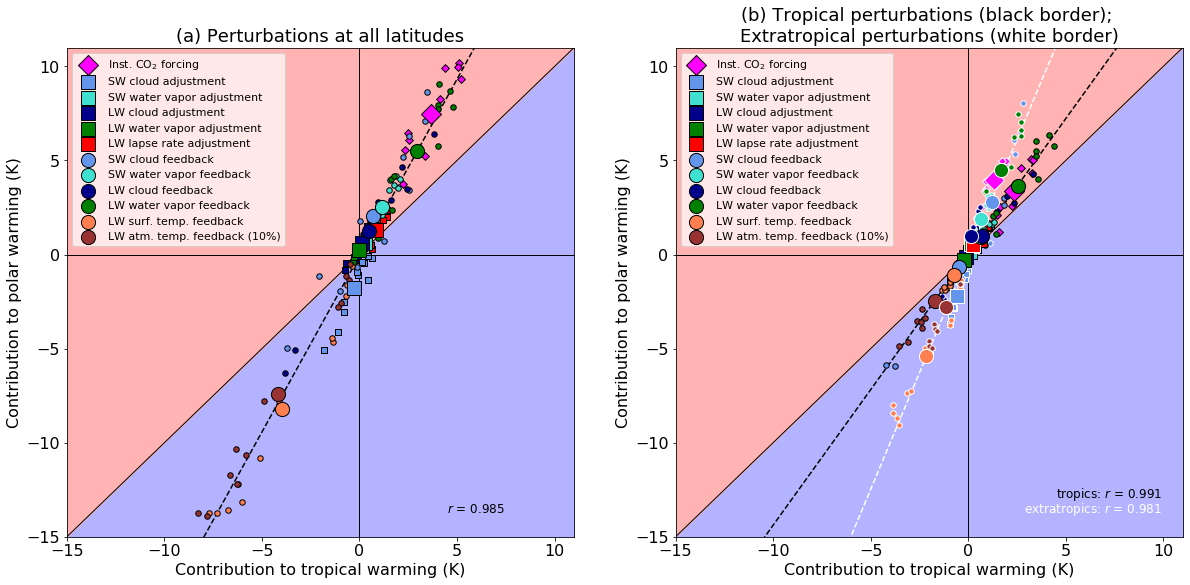

In [57]:
plt.figure(figsize=(20,9))

plt.subplot(1,2,1)
ax, legendEntries = plotContributionsTropicsPoles_mmm_withModelScatter(-mean_within_30_minus_all, -mean_within_30_minus_all_mean,
                                                                       -mean_poleward_70_minus_all, -mean_poleward_70_minus_all_mean, 
                                                                       models, exp_list_no_all, coeffs, corr, 
                                                                      '(a) Perturbations at all latitudes', 
                                                                      axis=[-15, 11, -15, 11])
plt.legend(legendEntries.values(), exp_names_contrib, loc = 'upper left', framealpha=0.7, fontsize=11)
#plt.axis([-15, 11, -15, 11])

plt.subplot(1,2,2)
ax, legendEntries = plotContributionsTropicsPoles_mmm_withModelScatter_tr_et(-mean_within_30_minus_all_tr, -mean_within_30_minus_all_tr_mean,
                                                                       -mean_poleward_70_minus_all_tr, -mean_poleward_70_minus_all_tr_mean, 
                                                                       -mean_within_30_minus_all_et, -mean_within_30_minus_all_et_mean,
                                                                       -mean_poleward_70_minus_all_et, -mean_poleward_70_minus_all_et_mean, 
                                                    models, exp_list_no_all, coeffs_tr, corr_tr, coeffs_et, corr_et,
                                                   '(b) Tropical perturbations (black border); \nExtratropical perturbations (white border)', 
                                                    axis=[-15, 11, -15, 11])
plt.legend(legendEntries.values(), exp_names_contrib, loc = 'upper left', framealpha=0.7, fontsize=11)
#plt.axis([-15, 11, -15, 11])

plt.savefig('plots/Figure4.png')
plt.savefig('plots/Figure4.pdf')

#plt.savefig('plots/Figure4_1000.png', dpi=1000)

In [37]:

#####   Version with dry EBM   #####
#(Figure S9)


In [38]:
#Load results from each EBM experiment 
EBM_control_noQ = xr.open_dataset('nc_from_xarray/EBM_perturb_results_noQ_096e4.nc')
EBM_f_inst_noQ = xr.open_dataset('nc_from_xarray/EBM_results_noQ_f_inst.nc')
EBM_adj_sw_cloud_noQ = xr.open_dataset('nc_from_xarray/EBM_results_noQ_adj_sw_cloud.nc')
EBM_adj_sw_noncloud_noQ = xr.open_dataset('nc_from_xarray/EBM_results_noQ_adj_sw_noncloud.nc')
EBM_adj_lw_ta_noQ = xr.open_dataset('nc_from_xarray/EBM_results_noQ_adj_lw_ta.nc')
EBM_adj_lw_wv_noQ = xr.open_dataset('nc_from_xarray/EBM_results_noQ_adj_lw_wv.nc')
EBM_adj_lw_cloud_noQ = xr.open_dataset('nc_from_xarray/EBM_results_noQ_adj_lw_cloud.nc')
EBM_fb_sw_cloud_noQ = xr.open_dataset('nc_from_xarray/EBM_results_noQ_fb_sw_cloud.nc')
EBM_fb_sw_noncloud_noQ = xr.open_dataset('nc_from_xarray/EBM_results_noQ_fb_sw_noncloud.nc')
EBM_fb_lw_wv_noQ = xr.open_dataset('nc_from_xarray/EBM_results_noQ_fb_lw_wv.nc')
EBM_fb_lw_ts_noQ = xr.open_dataset('nc_from_xarray/EBM_results_noQ_fb_lw_ts.nc')
EBM_fb_lw_cloud_noQ = xr.open_dataset('nc_from_xarray/EBM_results_noQ_fb_lw_cloud.nc')
EBM_fb_lw_ta_10p_noQ = xr.open_dataset('nc_from_xarray/EBM_results_noQ_fb_lw_ta_10p.nc')

In [39]:
#Concatenate results and take means

EBM_results_noQ = xr.concat([EBM_control_noQ, EBM_f_inst_noQ, EBM_adj_sw_cloud_noQ, EBM_adj_sw_noncloud_noQ, 
                         EBM_adj_lw_cloud_noQ, EBM_adj_lw_wv_noQ, EBM_adj_lw_ta_noQ, 
                         EBM_fb_sw_cloud_noQ, EBM_fb_sw_noncloud_noQ, 
                         EBM_fb_lw_cloud_noQ, EBM_fb_lw_wv_noQ, EBM_fb_lw_ts_noQ, 
                         EBM_fb_lw_ta_10p_noQ], dim=exp)
EBM_results_noQ = EBM_results_noQ.rename({'concat_dim': 'exp'})

EBM_results_noQ_poleward_70 = EBM_results_noQ.sel(lat=EBM_results_noQ.lat[np.abs(EBM_results_noQ.lat)>70])
mean_poleward_70_noQ = areaWeightedMean(EBM_results_noQ_poleward_70)
for var in list(dict(mean_poleward_70_noQ.data_vars).keys()):
    mean_poleward_70_noQ[var].loc[dict(model='NorESM2', exp=['no_f_inst', 'no_adj_lw_cloud', 'no_fb_lw_cloud'])] = np.nan
    mean_poleward_70_noQ[var].loc[dict(model='CNRM-AM6-DIA-v2', exp=['no_f_inst', 'no_adj_lw_wv', 'no_fb_lw_wv', 'no_adj_lw_cloud', 'no_fb_lw_cloud'])] = np.nan
mean_poleward_70_minus_all_noQ = mean_poleward_70_noQ - mean_poleward_70_noQ.sel(exp='all')

EBM_results_noQ_within_30 = EBM_results_noQ.sel(lat=EBM_results_noQ.lat[np.abs(EBM_results_noQ.lat)<30])
mean_within_30_noQ = areaWeightedMean(EBM_results_noQ_within_30)
for var in list(dict(mean_within_30_noQ.data_vars).keys()):
    mean_within_30_noQ[var].loc[dict(model='NorESM2', exp=['no_f_inst', 'no_adj_lw_cloud', 'no_fb_lw_cloud'])] = np.nan
    mean_within_30_noQ[var].loc[dict(model='CNRM-AM6-DIA-v2', exp=['no_f_inst', 'no_adj_lw_wv', 'no_fb_lw_wv', 'no_adj_lw_cloud', 'no_fb_lw_cloud'])] = np.nan
mean_within_30_minus_all_noQ = mean_within_30_noQ - mean_within_30_noQ.sel(exp='all')

mean_poleward_70_minus_all_mean_noQ = mean_poleward_70_minus_all_noQ.mean(dim='model')
mean_within_30_minus_all_mean_noQ = mean_within_30_minus_all_noQ.mean(dim='model')

In [40]:
#Fit and correlation coefficient

array_within_30_noQ = mean_within_30_minus_all_noQ['TS_perturb'][1:,:].data.flatten()
array_within_30_dn_noQ = array_within_30_noQ[~np.isnan(array_within_30_noQ)]
array_poleward_70_noQ = mean_poleward_70_minus_all_noQ['TS_perturb'][1:,:].data.flatten()
array_poleward_70_dn_noQ = array_poleward_70_noQ[~np.isnan(array_poleward_70_noQ)]
coeffs_noQ = np.polyfit(array_within_30_dn_noQ, array_poleward_70_dn_noQ, 1)
corr_noQ = np.corrcoef(array_within_30_dn_noQ, array_poleward_70_dn_noQ)[0,1]

[0.84173621 0.25490155]


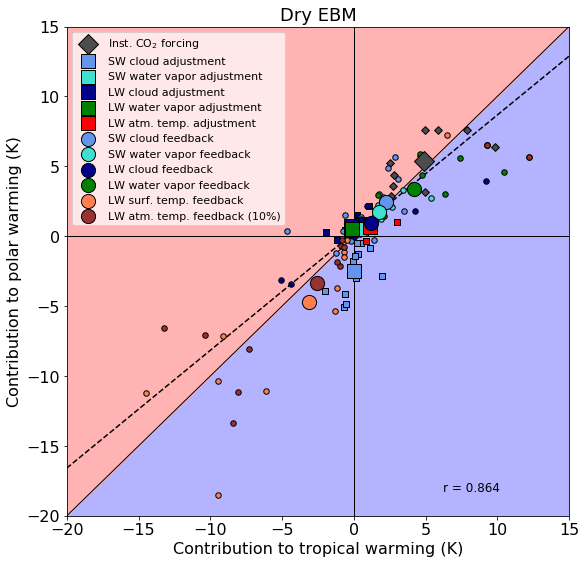

In [41]:
#Plot

plt.figure(figsize=(9,9))

ax, legendEntries = plotContributionsTropicsPoles_mmm_withModelScatter(-mean_within_30_minus_all_noQ, -mean_within_30_minus_all_mean_noQ,
                                                                       -mean_poleward_70_minus_all_noQ, -mean_poleward_70_minus_all_mean_noQ, 
                                                                       models, exp_list_no_all, coeffs_noQ, corr_noQ, 
                                                                      'Dry EBM', 
                                                                      axis=[-20, 15, -20, 15])
plt.legend(legendEntries.values(), exp_names_contrib, loc = 'upper left', framealpha=0.7, fontsize=11)

plt.savefig('plots/Figure4_noQ.png')
plt.savefig('plots/Figure4_noQ.pdf')

In [ ]:

#Individual models version
#(Figure S4, S5)


In [45]:
def plotContributionsTropicsPoles_singleModel_tr_et(dataTropics_tr, dataPoles_tr, dataTropics_et, dataPoles_et, exps, title):
    legendEntries = dict()
    for exp in exps:
        legendEntries[exp] = plt.scatter(dataTropics_tr.sel(exp=exp)['TS_perturb'].data, 
                                           dataPoles_tr.sel(exp=exp)['TS_perturb'].data, 
                                           s=200, color=colorsEachExp[exp], marker=symbolsEachExp[exp], edgecolors='k', linewidth=2)
        plt.scatter(dataTropics_et.sel(exp=exp)['TS_perturb'].data, 
                    dataPoles_et.sel(exp=exp)['TS_perturb'].data, 
                    s=200, color=colorsEachExp[exp], marker=symbolsEachExp[exp], edgecolors='w', linewidth=2)
        
    plt.xlabel('Contribution to tropical warming (K)')
    plt.ylabel('Contribution to polar warming (K)')
    plt.title(title)
    #Scale axes equally and add 0 and 1:1 lines
    ax = plt.gca()
    og_xlim_0 = ax.get_xlim()[0]
    og_xlim_1 = ax.get_xlim()[1]
    og_ylim_0 = ax.get_ylim()[0]
    og_ylim_1 = ax.get_ylim()[1]
    new_xlim_0 = np.min([og_xlim_0, og_ylim_0])
    new_ylim_0 = np.min([og_xlim_0, og_ylim_0])
    new_xlim_1 = np.max([og_xlim_1, og_ylim_1])
    new_ylim_1 = np.max([og_xlim_1, og_ylim_1])
    plt.hlines(0, new_xlim_0, new_xlim_1, linewidth=1, zorder=-2)
    plt.vlines(0, new_ylim_0, new_ylim_1, linewidth=1, zorder=-3)
    plt.plot([-100, 100], [-100, 100], linewidth=1, color='k', zorder=-4)
    plt.axis([new_xlim_0, new_xlim_1, new_ylim_0, new_ylim_1])
    #Fill background indicating polar or tropical amplification
    plt.fill_between([new_xlim_0, new_xlim_1], [new_ylim_1, new_ylim_1], [new_ylim_0, new_ylim_1], color=[1,0.7,0.7], zorder=-10)
    plt.fill_between([new_xlim_0, new_xlim_1], [new_ylim_0, new_ylim_1], [new_ylim_0, new_ylim_0], color=[0.7,0.7,1], zorder=-11)
    return ax, legendEntries

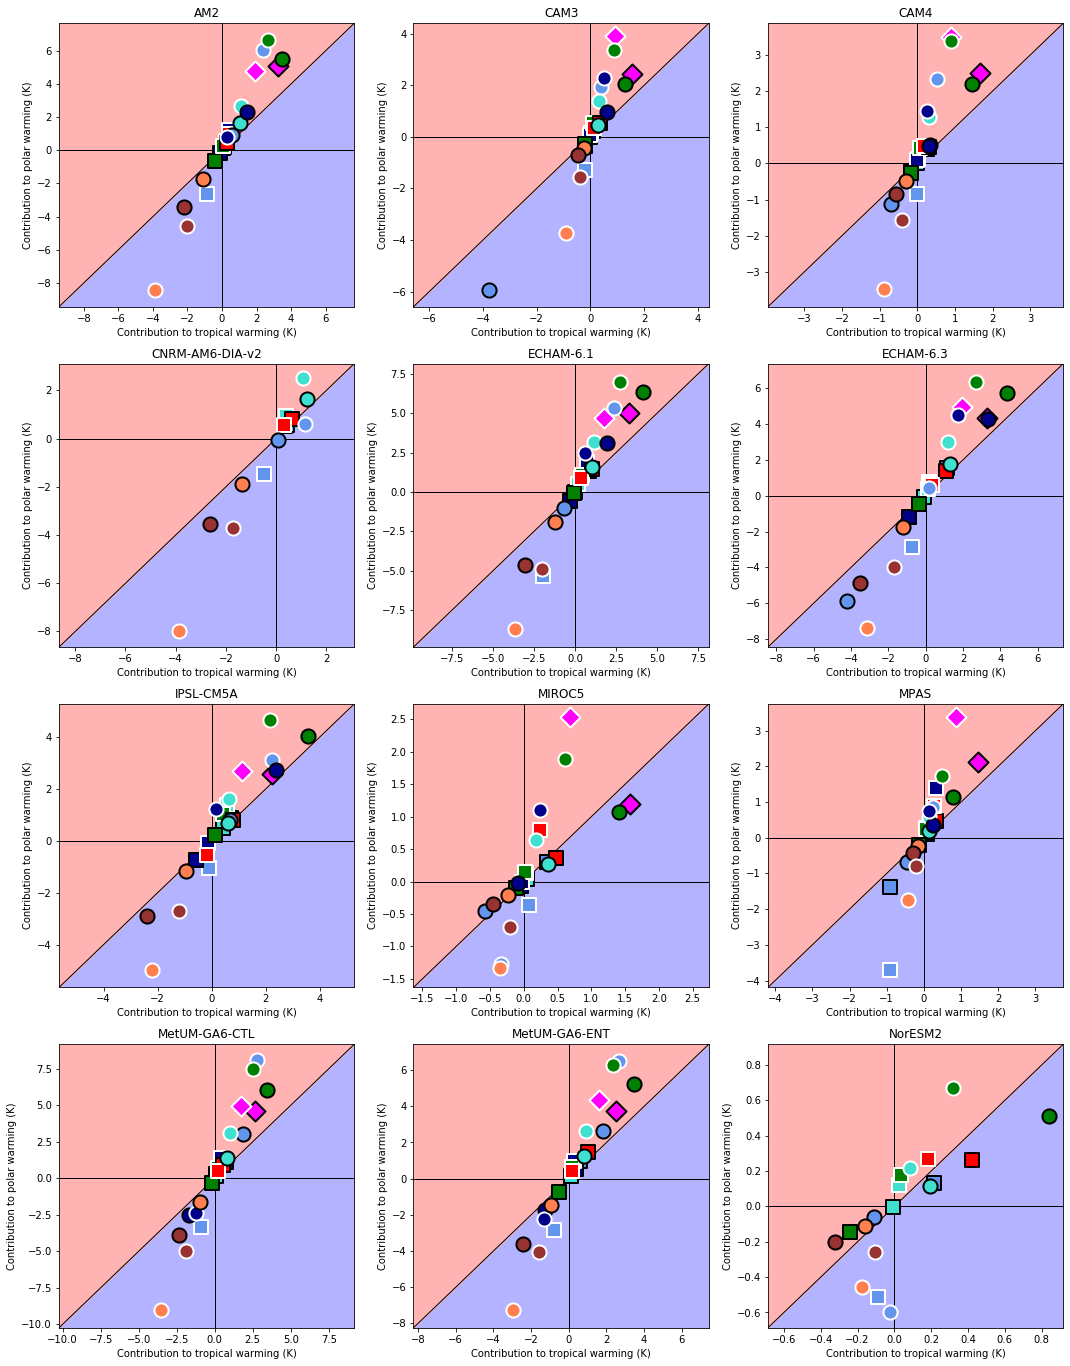

In [54]:
#Plot all on a 3x4 subplot grid
plt.figure(figsize=(18,24))

for i in np.arange(len(models)):    
    plt.subplot(4,3,i+1)
    model = models[i]
    ax, legendEntries  = plotContributionsTropicsPoles_singleModel_tr_et(-mean_within_30_minus_all_tr.sel(model=model), 
                                                                         -mean_poleward_70_minus_all_tr.sel(model=model), 
                                                                         -mean_within_30_minus_all_et.sel(model=model), 
                                                                         -mean_poleward_70_minus_all_et.sel(model=model), 
                                                                          exp_list_no_all, 
                                                                          models[i])
    #No legend--too hard to fit
    #if i == 0:
        #plt.legend(legendEntries.values(), exp_names_contrib, loc = 'upper left', framealpha=.8)
        
#plt.tight_layout()
    
plt.savefig('plots/figure_supp_scatter_indiv_models_tr_et.pdf')
plt.savefig('plots/figure_supp_scatter_indiv_models_tr_et.png')


In [55]:
#Version for the full perturbation experiments (like Fig. 4a)
def plotContributionsTropicsPoles_singleModel(dataTropics, dataPoles, exps, title):
    legendEntries = dict()
    for exp in exps:
        legendEntries[exp] = plt.scatter(dataTropics.sel(exp=exp)['TS_perturb'].data, 
                                           dataPoles.sel(exp=exp)['TS_perturb'].data, 
                                           s=200, color=colorsEachExp[exp], marker=symbolsEachExp[exp], edgecolors='k', linewidth=2)
    plt.xlabel('Contribution to tropical warming (K)')
    plt.ylabel('Contribution to polar warming (K)')
    plt.title(title)
    #Scale axes equally and add 0 and 1:1 lines
    ax = plt.gca()
    og_xlim_0 = ax.get_xlim()[0]
    og_xlim_1 = ax.get_xlim()[1]
    og_ylim_0 = ax.get_ylim()[0]
    og_ylim_1 = ax.get_ylim()[1]
    new_xlim_0 = np.min([og_xlim_0, og_ylim_0])
    new_ylim_0 = np.min([og_xlim_0, og_ylim_0])
    new_xlim_1 = np.max([og_xlim_1, og_ylim_1])
    new_ylim_1 = np.max([og_xlim_1, og_ylim_1])
    plt.hlines(0, new_xlim_0, new_xlim_1, linewidth=1, zorder=-2)
    plt.vlines(0, new_ylim_0, new_ylim_1, linewidth=1, zorder=-3)
    plt.plot([-100, 100], [-100, 100], linewidth=1, color='k', zorder=-4)
    plt.axis([new_xlim_0, new_xlim_1, new_ylim_0, new_ylim_1])
    #Fill background indicating polar or tropical amplification
    plt.fill_between([new_xlim_0, new_xlim_1], [new_ylim_1, new_ylim_1], [new_ylim_0, new_ylim_1], color=[1,0.7,0.7], zorder=-10)
    plt.fill_between([new_xlim_0, new_xlim_1], [new_ylim_0, new_ylim_1], [new_ylim_0, new_ylim_0], color=[0.7,0.7,1], zorder=-11)
    return ax, legendEntries

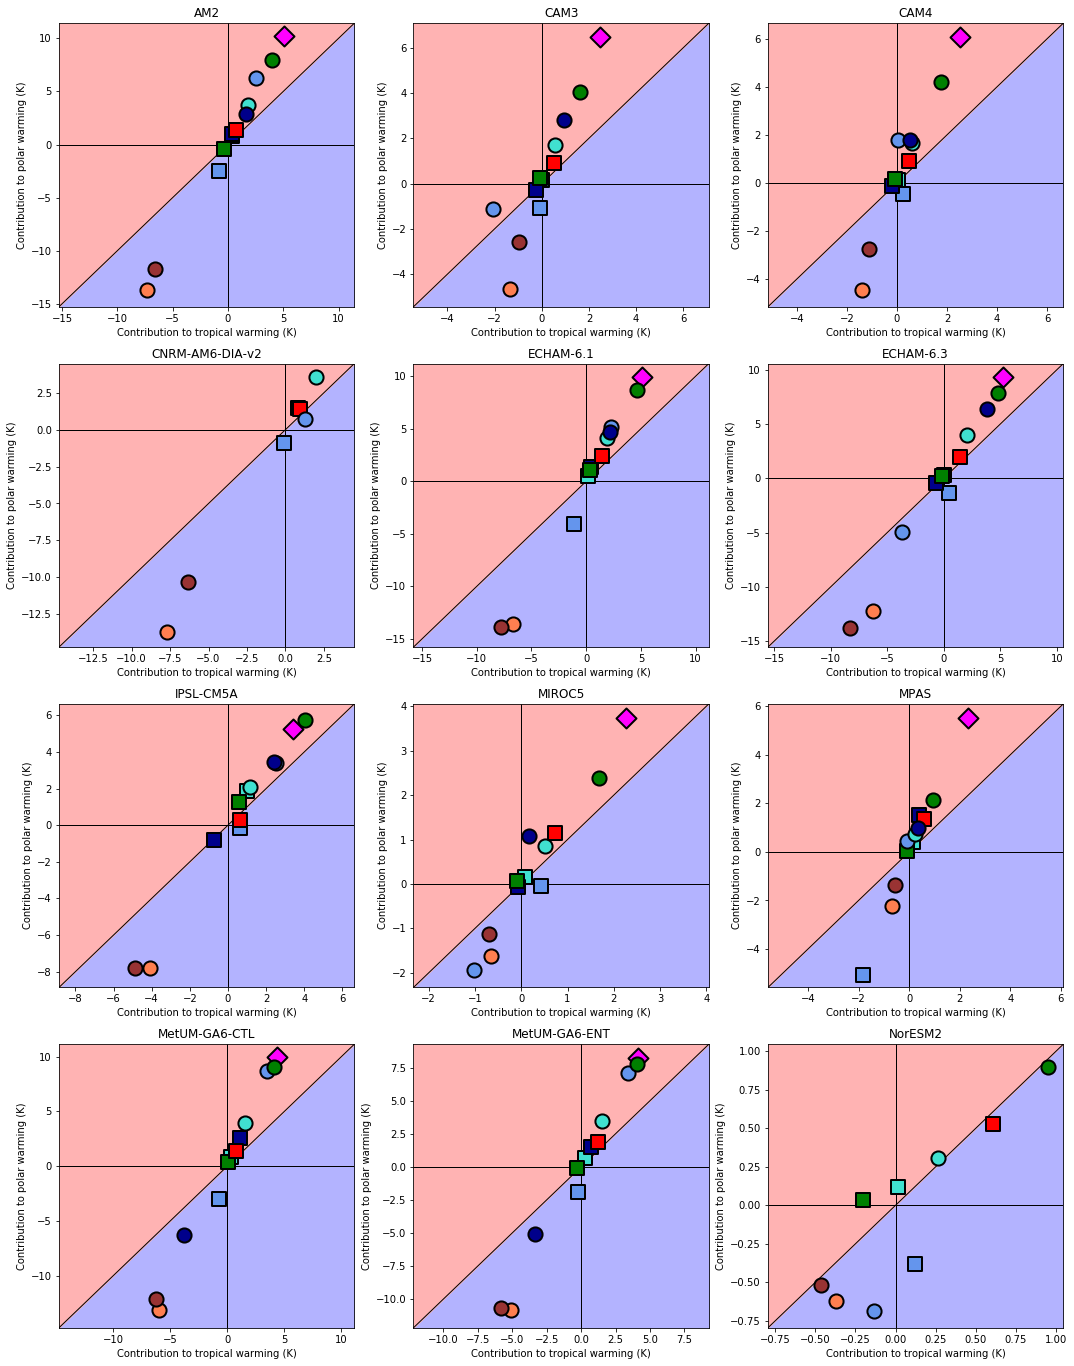

In [59]:
#Plot all on a 3x4 subplot grid
plt.figure(figsize=(18,24))

for i in np.arange(len(models)):    
    plt.subplot(4,3,i+1)
    model = models[i]
    ax, legendEntries  = plotContributionsTropicsPoles_singleModel(-mean_within_30_minus_all.sel(model=model), 
                                                                   -mean_poleward_70_minus_all.sel(model=model),  
                                                                    exp_list_no_all, 
                                                                    models[i])
    #No legend--too hard to fit
    #if i == 0:
        #plt.legend(legendEntries.values(), exp_names_contrib, loc = 'upper left', framealpha=.8)
        
#plt.tight_layout()
    
plt.savefig('plots/figure_supp_scatter_indiv_models.pdf')
plt.savefig('plots/figure_supp_scatter_indiv_models.png')